In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

# import some data to play with
iris = datasets.load_iris()
X = iris.data 
y = iris.target
names = iris.feature_names
X, y = shuffle(X, y, random_state=42)

In [2]:
model = KMeans(n_clusters=3, random_state=42) 
iris_kmeans = model.fit(X)

In [3]:
iris_kmeans.labels_

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,
       2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0,
       1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0])

In [5]:
import numpy as np
y = np.choose(y, [1, 2, 0]).astype(int)
y

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0,
       1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0])

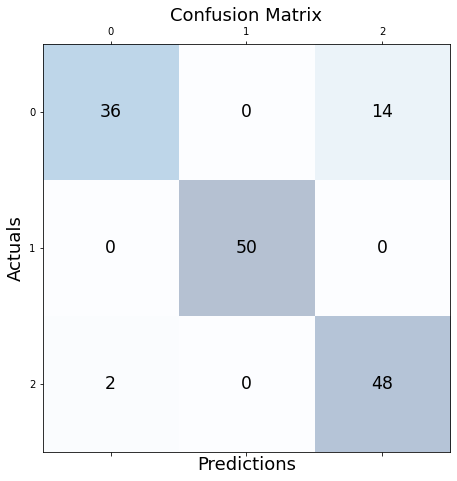

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, iris_kmeans.labels_) 

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [13]:
from matplotlib.colors import ListedColormap

<ipython-input-15-3ebf3f364032>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


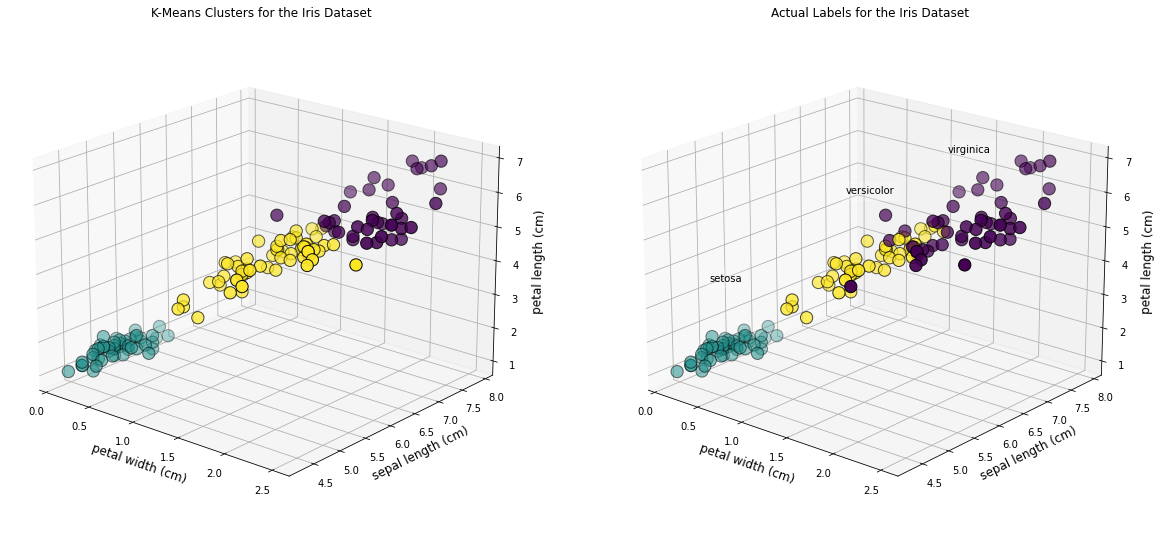

In [15]:

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 3], X[:, 0], X[:, 2], 
            c=iris_kmeans.labels_.astype(float), 
           edgecolor="k", s=150)
ax1.view_init(20, -50)
ax1.set_xlabel(names[3], fontsize=12)
ax1.set_ylabel(names[0], fontsize=12)
ax1.set_zlabel(names[2], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=12)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for label, name in enumerate(['virginica','setosa','versicolor']):
    ax2.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax2.scatter(X[:, 3], X[:, 0], X[:, 2], 
            c=y, edgecolor="k", s=150)
ax2.view_init(20, -50)
ax2.set_xlabel(names[3], fontsize=12)
ax2.set_ylabel(names[0], fontsize=12)
ax2.set_zlabel(names[2], fontsize=12)
ax2.set_title("Actual Labels for the Iris Dataset", fontsize=12)
fig.show()


In [16]:
wcss=[]
for i in range(1,7):
kmeans = KMeans(i)
kmeans.fit(x)
wcss_iter = kmeans.inertia_
wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

IndentationError: expected an indented block (<ipython-input-16-99478b689f70>, line 3)